**Step 1**: Setting up Google Colab

In [2]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 21.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
import csv
import pandas
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#download the dataset
download1 = drive.CreateFile({'id': '1qxLPeBqDOydXsG5z2N2xQDIRi20kAOml'})

In [0]:
download1.GetContentFile('ground_truth.zip')
!unzip ground_truth.zip

In [0]:
#download the dataset
download2 = drive.CreateFile({'id': '13xES8GAhlEgC-6wHVl20PUowsmoN9VKo'})

In [0]:
download2.GetContentFile('tesseract.zip')
!unzip tesseract.zip

In [0]:
download3 = drive.CreateFile({'id': '1Pm0ywuZ_BvPETd8TYO6-PwznanPF2D4s'})
download3.GetContentFile('confusion_matrix.zip')
!unzip confusion_matrix.zip

In [10]:
#read confustion matrix
with open('/content/confusion_matrix/add_matrix.csv', 'r', newline='') as csv_file:
    reader = csv.reader(line.replace('  ', ',') for line in csv_file)
    add_matrix = list(reader)
    print(add_matrix)

[['15', '1', '14', '7', '10', '0', '1', '1', '33', '1', '4', '31', '2', '39', '12', '4', '3', '28', '134', '7', '28', '0', '1', '1', '4', '1'], ['3', '11', '0', '0', '7', '0', '1', '0', '50', '0', '0', '15', '0', '1', '1', '0', '0', '5', '16', '0', '0', '3', '0', '0', '0', '0'], ['19', '0', '54', '1', '13', '0', '0', '18', '50', '0', '3', '1', '1', '1', '7', '1', '0', '7', '25', '7', '8', '4', '0', '1', '0', '0'], ['18', '0', '3', '17', '14', '2', '0', '0', '9', '0', '0', '6', '1', '9', '13', '0', '0', '6', '119', '0', '0', '0', '0', '0', '5', '0'], ['39', '2', '8', '76', '147', '2', '0', '1', '4', '0', '3', '4', '6', '27', '5', '1', '0', '83', '417', '6', '4', '1', '10', '2', '8', '0'], ['1', '0', '0', '0', '2', '27', '1', '0', '12', '0', '0', '10', '0', '0', '0', '0', '0', '5', '23', '0', '1', '0', '0', '0', '1', '0'], ['8', '0', '0', '0', '5', '1', '5', '12', '8', '0', '0', '2', '0', '1', '1', '0', '1', '5', '69', '2', '3', '0', '1', '0', '0', '0'], ['4', '1', '0', '1', '24', '0', '

In [11]:
with open('/content/confusion_matrix/del_matrix.csv', 'r', newline='') as csv_file:
    reader = csv.reader(line.replace('  ', ',') for line in csv_file)
    del_matrix = list(reader)
    print(del_matrix)

[['0', '7', '58', '21', '3', '5', '18', '8', '61', '0', '4', '43', '5', '53', '0', '9', '0', '98', '28', '53', '62', '1', '0', '0', '2', '0'], ['2', '2', '1', '0', '22', '0', '0', '0', '183', '0', '0', '26', '0', '0', '2', '0', '0', '6', '17', '0', '6', '1', '0', '0', '0', '0'], ['37', '0', '70', '0', '63', '0', '0', '24', '320', '0', '9', '17', '0', '0', '33', '0', '0', '46', '6', '54', '17', '0', '0', '0', '1', '0'], ['12', '0', '7', '25', '45', '0', '10', '0', '62', '1', '1', '8', '4', '3', '3', '0', '0', '11', '1', '0', '3', '2', '0', '0', '6', '0'], ['80', '1', '50', '74', '89', '3', '1', '1', '6', '0', '0', '32', '9', '76', '19', '9', '1', '237', '223', '34', '8', '2', '1', '7', '1', '0'], ['4', '0', '0', '0', '13', '46', '0', '0', '79', '0', '0', '12', '0', '0', '4', '0', '0', '11', '0', '8', '1', '0', '0', '0', '1', '0'], ['25', '0', '0', '2', '83', '1', '37', '25', '39', '0', '0', '3', '0', '29', '4', '0', '0', '52', '7', '1', '22', '0', '0', '0', '1', '0'], ['15', '12', '1', 

In [12]:
with open('/content/confusion_matrix/rev_matrix.csv', 'r', newline='') as csv_file:
    reader = csv.reader(line.replace('  ', ',') for line in csv_file)
    rev_matrix = list(reader)
    print(rev_matrix[8][4])

66


In [13]:
with open('/content/confusion_matrix/sub_matrix.csv', 'r', newline='') as csv_file:
    reader = csv.reader(line.replace('  ', ',') for line in csv_file)
    sub_matrix = list(reader)
    print(sub_matrix[8][4])

146


**Step 2** : Import the libraries we’ll need during our model building phase.

In [0]:
import string
import glob
import os
import itertools
import collections
import timeit
import random
import pandas 
import numpy

**Step 3**: preprocessing of the text

In [0]:
def clean_text(word):
  res=[]
  for w in word:
    if w.lower() not in string.ascii_lowercase:
      continue
    res.append(w.lower())
  return ''.join(res)

**Error Detection**

In [104]:
# We have RGB images, we should set grayscale as False
word_list=[]
file_names = glob.glob(os.path.join(os.getcwd(), 'ground_truth', '*.txt'))
for i in range(len(file_names)):
  with open(file_names[i]) as file:
    raw=file.read().split()
    word_list+=list(filter(lambda x: 1<len(x)<21,list(map(clean_text,raw))))
    print(word_list)
    break
word_set=set(word_list)
print(word_list)
print(len(word_list))

['exhibit', 'report', 'by', 'the', 'director', 'of', 'government', 'relations', 'william', 'stover', 'may', 'senate', 'committee', 'working', 'on', 'tax', 'legislation', 'the', 'senate', 'finance', 'committee', 'began', 'markup', 'of', 'tax', 'reformtax', 'reduction', 'legislation', 'on', 'april', 'and', 'is', 'expected', 'to', 'report', 'some', 'type', 'of', 'tax', 'measure', 'by', 'midjune', 'although', 'it', 'is', 'not', 'clear', 'just', 'what', 'the', 'scope', 'of', 'the', 'committees', 'action', 'will', 'be', 'it', 'is', 'entirely', 'possible', 'that', 'their', 'bill', 'will', 'simply', 'extend', 'tax', 'reduction', 'pro', 'visions', 'which', 'expire', 'on', 'june', 'thus', 'delaying', 'action', 'on', 'tax', 'reform', 'package', 'until', 'later', 'in', 'the', 'year', 'senator', 'russell', 'long', 'chairman', 'of', 'the', 'finance', 'conxnittee', 'has', 'indicated', 'that', 'such', 'course', 'is', 'distinct', 'possibility', 'during', 'the', 'past', 'two', 'weeks', 'of', 'markup', '

In [0]:
word_length=collections.defaultdict(list)
for word in word_list:
  word_length[len(word)].append(word)

In [18]:
word_dic=collections.defaultdict(dict)
for wl in word_length:
  for i, j in itertools.combinations(range(wl), 2):
    positional_ngram=[[0]*26 for i in range(26)]
    for w in word_length[wl]:
      positional_ngram[ord(w[i])-97][ord(w[j])-97]=1
    word_dic[wl][(i,j)]=positional_ngram
print(word_dic[3])

{(0, 1): [[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0], [1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0], [1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0], [1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0], [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0], [1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0], [1, 1, 1, 1, 1, 0, 0, 0, 1, 0,

In [100]:
test_list=[]
file_names1 = glob.glob(os.path.join(os.getcwd(), 'tesseract', '*.txt'))
for i in range(len(file_names1)):
  with open(file_names1[i]) as file:
    raw=file.read().split()
    test_list+=list(filter(lambda x: 1<len(x)<21,list(map(clean_text,raw))))
print(test_list)


['exhlblt', 'report', 'by', 'the', 'director', 'of', 'government', 'relations', 'william', 'stover', 'may', 'senate', 'committee', 'working', 'tax', 'legislation', 'the', 'senate', 'flnance', 'commlttee', 'began', 'markup', 'of', 'tax', 'reformtax', 'reductlon', 'leglslatlon', 'on', 'aprll', 'and', 'expected', 'to', 'report', 'some', 'type', 'of', 'tax', 'measure', 'by', 'mldijune', 'although', 'not', 'clear', 'just', 'what', 'the', 'scope', 'of', 'the', 'commlttees', 'actlon', 'will', 'be', 'entlrely', 'posslble', 'that', 'thelr', 'mu', 'hill', 'mply', 'extend', 'tax', 'reductlon', 'pro', 'visions', 'whlch', 'explre', 'on', 'june', 'thus', 'delaylng', 'actlon', 'on', 'tax', 'recom', 'package', 'untll', 'later', 'the', 'year', 'senator', 'russell', 'long', 'chalman', 'of', 'the', 'flnance', 'conxnlttee', 'has', 'ndcated', 'that', 'such', 'course', 'dlstlnct', 'posslblllty', 'durlng', 'the', 'past', 'two', 'weeks', 'of', 'markup', 'sesslons', 'the', 'senate', 'commlttee', 'dealt', 'prlm

In [99]:
error=[]
context=[]
for idx, tw in enumerate(test_list):
  for i, j in itertools.combinations(range(len(tw)), 2):
    if not word_dic[len(tw)][(i,j)][ord(tw[i])-97][ord(tw[j])-97]:
      error.append(tw)
      if idx==0:
        context.append(('',tw,test_list[idx+1],word_list[idx]))
      elif idx==len(test_list)-1:
        context.append((test_list[idx-1],tw,'',word_list[idx]))
      else:
        context.append((test_list[idx-1],tw,test_list[idx+1],word_list[idx]))
      break
print(context)                                                        
print(len(word_list))    
print(len(test_list)) 

[('', 'exhlblt', 'report', 'exhibit'), ('reformtax', 'reductlon', 'leglslatlon', 'reformtax'), ('reductlon', 'leglslatlon', 'on', 'reduction'), ('by', 'mldijune', 'although', 'measure'), ('that', 'thelr', 'mu', 'be'), ('thelr', 'mu', 'hill', 'it'), ('hill', 'mply', 'extend', 'entirely'), ('tax', 'reductlon', 'pro', 'their'), ('whlch', 'explre', 'on', 'extend'), ('thus', 'delaylng', 'actlon', 'visions'), ('flnance', 'conxnlttee', 'has', 'senator'), ('has', 'ndcated', 'that', 'long'), ('dlstlnct', 'posslblllty', 'durlng', 'conxnittee'), ('posslblllty', 'durlng', 'the', 'has'), ('of', 'llttle', 'threat', 'senate'), ('threat', 'nterest', 'to', 'dealt'), ('be', 'characterlzed', 'as', 'is'), ('as', 'easlng', 'off', 'to'), ('on', 'llmltatlons', 'or', 'that'), ('restrlctlons', 'ncluded', 'the', 'could'), ('the', 'bonsaipassed', 'tax', 'characterized'), ('capltal', 'formatlon', 'and', 'many'), ('and', 'forelgn', 'ncome', 'are'), ('ncome', 'provlslons', 'actlons', 'therefore'), ('tax', 'mu', 'co

In [0]:
def find_candidates(word):
  letters='abcdefghijklmnopqrstuvwxyz'
  candidates={'insertion':[],'deletion':[],'substitution':[],'reversal':[]}
  #insertion
  for i in range(len(word)+1):
    for l in letters:
      new=word[:i]+l+word[i:]
      if new in word_set:
        if i>0:
          pre=ord(word[i-1])-97
        else:
          pre=26
        candidates['insertion'].append((new,(pre,ord(l)-97)))
  #deletion
  for i in range(len(word)):
    new=word[:i]+word[i+1:]
    if new in word_set:
      if i>0:
          pre=ord(word[i-1])-97
      else:
          pre=26
      now=ord(word[i])-97
      candidates['deletion'].append((new,(pre,now)))
  #substitution:
  for i in range(len(word)):
    for l in letters:
      if word[i]!=l:
        new=word[:i]+l+word[i+1:]
        if new in word_set:
          candidates['substitution'].append((new,(ord(l)-97,ord(word[i])-97)))
  #reversal:
  for i in range(len(word)-1):
    new=list(word)
    new[i],new[i+1]=new[i+1],new[i]
    new=''.join(new)
    if new in word_set:
      candidates['reversal'].append((new,(ord(word[i])-97,ord(word[i+1])-97)))
  return candidates
    
    

In [57]:
print(find_candidates('acress'))

{'insertion': [], 'deletion': [], 'substitution': [('access', (2, 17)), ('across', (14, 4))], 'reversal': []}


In [58]:
all_candidates=collections.defaultdict(dict)
for e in error:
  all_candidates[e]=find_candidates(e)
print(all_candidates)

defaultdict(<class 'dict'>, {'exhlblt': {'insertion': [], 'deletion': [], 'substitution': [], 'reversal': []}, 'reductlon': {'insertion': [], 'deletion': [], 'substitution': [('reduction', (8, 11))], 'reversal': []}, 'leglslatlon': {'insertion': [], 'deletion': [], 'substitution': [('legislatlon', (8, 11))], 'reversal': []}, 'mldijune': {'insertion': [], 'deletion': [], 'substitution': [], 'reversal': []}, 'thelr': {'insertion': [], 'deletion': [('ther', (4, 11))], 'substitution': [('their', (8, 11))], 'reversal': []}, 'mu': {'insertion': [], 'deletion': [], 'substitution': [('au', (0, 12)), ('bu', (1, 12)), ('du', (3, 12)), ('ou', (14, 12)), ('qu', (16, 12)), ('ma', (0, 20)), ('mb', (1, 20)), ('mc', (2, 20)), ('md', (3, 20)), ('me', (4, 20)), ('mg', (6, 20)), ('mi', (8, 20)), ('mm', (12, 20)), ('mn', (13, 20)), ('mo', (14, 20)), ('mr', (17, 20)), ('ms', (18, 20)), ('mt', (19, 20)), ('my', (24, 20))], 'reversal': []}, 'mply': {'insertion': [('amply', (26, 0)), ('imply', (26, 8))], 'del

In [59]:
#ELE to compute Pr(c)
N=len(word_list)
V=len(word_set)
word_frequency=collections.defaultdict(int)
for w in word_list:
  word_frequency[w]+=1
probability_c=collections.defaultdict(float)
for k in word_frequency:
  probability_c[k]=(word_frequency[k]+0.5)/(N+V/2)
print(word_frequency)
print(probability_c)

defaultdict(<class 'int'>, {'exhibit': 254, 'report': 671, 'by': 1857, 'the': 18861, 'director': 92, 'of': 10188, 'government': 415, 'relations': 235, 'william': 70, 'stover': 33, 'may': 420, 'senate': 436, 'committee': 1602, 'working': 172, 'on': 3508, 'tax': 670, 'legislation': 541, 'finance': 93, 'began': 42, 'markup': 37, 'reformtax': 1, 'reduction': 65, 'april': 76, 'and': 8805, 'is': 2563, 'expected': 172, 'to': 8363, 'some': 321, 'type': 24, 'measure': 33, 'midjune': 3, 'although': 116, 'it': 935, 'not': 780, 'clear': 30, 'just': 65, 'what': 150, 'scope': 32, 'committees': 267, 'action': 306, 'will': 1752, 'be': 2133, 'entirely': 11, 'possible': 143, 'that': 2429, 'their': 437, 'bill': 518, 'simply': 11, 'extend': 21, 'pro': 50, 'visions': 5, 'which': 937, 'expire': 5, 'june': 121, 'thus': 48, 'delaying': 1, 'reform': 199, 'package': 65, 'until': 91, 'later': 42, 'in': 5728, 'year': 544, 'senator': 139, 'russell': 10, 'long': 52, 'chairman': 340, 'conxnittee': 1, 'has': 1309, 'i

In [0]:
def get_prob_c(correction):
  return probability_c[correction]

In [60]:
single=[0]*26+[N]
pair=[[0 for i in range(26)] for i in range(27)]
for w in word_set:
  for i in range(len(w)):
    single[ord(w[i])-97]+=1
    if i==0:
      pair[26][ord(w[i])-97]+=1
    else:
      pair[ord(w[i-1])-97][ord(w[i])-97]+=1
#ELE
for i in range(len(pair)):
  for j in range(len(pair[0])):
    if not pair[i][j]:
      pair[i][j]=0.5
print(single)
print(pair)

[10321, 1774, 5764, 4822, 14152, 1907, 2962, 2366, 10316, 231, 735, 5939, 3513, 9446, 7817, 3547, 193, 8588, 8567, 9261, 3551, 1558, 955, 470, 1882, 327, 277888]
[[201, 304, 607, 442, 113, 126, 264, 30, 354, 9, 92, 1231, 292, 1197, 35, 264, 13, 1107, 673, 1799, 176, 107, 68, 51, 147, 31], [242, 30, 31, 2, 256, 5, 3, 6, 203, 17, 1, 309, 13, 4, 149, 8, 0.5, 143, 81, 22, 160, 5, 0.5, 1, 35, 0.5], [735, 17, 144, 12, 635, 11, 8, 515, 423, 4, 176, 197, 53, 15, 1287, 19, 7, 198, 92, 572, 215, 4, 1, 2, 79, 1], [281, 12, 34, 42, 952, 22, 42, 9, 655, 19, 4, 91, 59, 22, 171, 12, 1, 114, 144, 23, 225, 46, 37, 2, 32, 0.5], [645, 61, 636, 1621, 412, 219, 189, 54, 141, 7, 17, 633, 490, 1803, 109, 267, 61, 1924, 1537, 499, 38, 244, 108, 261, 96, 10], [182, 2, 21, 9, 261, 191, 4, 3, 393, 2, 1, 115, 6, 2, 254, 7, 1, 116, 31, 59, 123, 1, 2, 1, 37, 0.5], [223, 4, 3, 2, 441, 6, 33, 155, 162, 2, 0.5, 51, 26, 89, 117, 9, 0.5, 218, 88, 24, 115, 0.5, 5, 0.5, 48, 0.5], [462, 7, 10, 9, 503, 6, 3, 7, 299, 1, 2, 7

In [0]:
def get_prob_tc(error,type,a,b):
  if type=='deletion':
    return int(del_matrix[a][b])/pair[a][b]
  if type=='insertion':
    return int(add_matrix[a][b])/single[a]
  if type=='substitution':
    return int(sub_matrix[b][a])/single[a]
  if type=='reversal':
    return int(rev_matrix[a][b])/pair[a][b]

In [62]:
print(all_candidates['taff']['insertion'][0][1])
print(type(add_matrix[26][18]))
print(single[26])
print(get_prob_tc('taff','insertion',all_candidates['taff']['insertion'][0][1][0],all_candidates['taff']['insertion'][0][1][1]))

(26, 18)
<class 'str'>
277888
8.276715799170888e-05


In [51]:
context_dict={}
for i in range(len(word_list)):
  if word_list[i] not in context_dict:
    context_dict[word_list[i]]={'left':{},'right':{}}
  if i>0 and i<len(word_list)-1:
    context_dict[word_list[i]]['left'][word_list[i-1]]=context_dict[word_list[i]]['left'].get(word_list[i-1],0)+1
    context_dict[word_list[i]]['right'][word_list[i+1]]=context_dict[word_list[i]]['right'].get(word_list[i+1],0)+1
  elif i==0:
    context_dict[word_list[i]]['right'][word_list[i+1]]=context_dict[word_list[i]]['right'].get(word_list[i+1],0)+1
  else:
    context_dict[word_list[i]]['left'][word_list[i-1]]=context_dict[word_list[i]]['left'].get(word_list[i-1],0)+1
print(context_dict['staff'])

{'left': {'committee': 13, 'directed': 1, 'and': 22, 'cma': 53, 'agency': 2, 'his': 1, 'soon': 1, 'legal': 3, 'mca': 27, 'active': 1, 'the': 32, 'cic': 2, 'association': 4, 'program': 2, 'cbia': 1, 'aik': 1, 'aim': 1, 'nvbc': 1, 'tma': 1, 'kvma': 1, 'professional': 7, 'crc': 1, 'subcommittee': 4, 'qta': 1, 'support': 5, 'ota': 1, 'improve': 1, 'parttime': 2, 'fulltime': 1, 'permit': 1, 'technical': 4, 'epa': 11, 'significant': 1, 'various': 1, 'cmas': 1, 'waxmans': 1, 'congressional': 10, 'senate': 1, 'this': 2, 'pa': 2, 'or': 4, 'good': 1, 'relations': 6, 'present': 2, 'to': 4, 'concurs': 2, 'associations': 2, 'policy': 2, 'minimal': 1, 'division': 3, 'affairs': 2, 'ncsl': 1, 'federal': 1, 'exhibit': 4, 'house': 1, 'travel': 4, 'companies': 3, 'one': 2, 'additional': 6, 'its': 5, 'similar': 1, 'provided': 1, 'building': 1, 'within': 1, 'osha': 2, 'way': 1, 'annual': 1, 'year': 1, 'by': 1, 'law': 1, 'personnel': 1, 'small': 1, 'because': 1, 'japan': 1, 'draft': 1, 'nevertheless': 1, 't

In [48]:
frequency_frequency={}
for k in context_dict:
  if k not in frequency_frequency:
    frequency_frequency[k]={'left':{},'right':{}}
  for key,v in context_dict[k]['left'].items():
    frequency_frequency[k]['left'][v]=frequency_frequency[k]['left'].get(v,0)+1
  for key,v in context_dict[k]['right'].items():
    frequency_frequency[k]['right'][v]=frequency_frequency[k]['right'].get(v,0)+1
print(frequency_frequency['staff'])

{'left': {13: 1, 1: 78, 22: 1, 53: 1, 2: 17, 3: 7, 27: 1, 32: 1, 4: 7, 7: 1, 5: 2, 11: 1, 10: 1, 6: 2}, 'right': {1: 89, 32: 1, 11: 1, 2: 25, 3: 11, 20: 2, 8: 2, 5: 7, 4: 3, 6: 2, 14: 1, 7: 2}}
{'exhibit': {'left': {108: 1, 1: 44, 64: 1, 23: 1, 9: 1, 3: 1, 2: 1}, 'right': {48: 1, 1: 68, 10: 2, 3: 9, 6: 3, 4: 3, 2: 13, 7: 1, 13: 1, 5: 3}}, 'report': {'left': {48: 1, 27: 1, 67: 1, 29: 1, 1: 138, 4: 6, 2: 34, 22: 1, 21: 1, 3: 18, 35: 1, 7: 1, 6: 2, 47: 1, 11: 1, 5: 1, 17: 2, 14: 1, 8: 1}, 'right': {12: 2, 1: 117, 18: 1, 161: 1, 60: 1, 2: 15, 4: 4, 7: 2, 61: 2, 8: 1, 6: 1, 3: 8, 13: 2, 5: 2, 9: 2, 17: 1}}, 'by': {'left': {12: 2, 1: 502, 17: 3, 22: 1, 2: 120, 8: 9, 5: 18, 7: 3, 3: 58, 4: 27, 10: 5, 32: 1, 18: 3, 6: 17, 14: 3, 11: 6, 16: 5, 9: 4, 13: 1, 15: 1, 21: 1, 19: 1, 23: 1}, 'right': {582: 1, 1: 386, 34: 2, 16: 2, 3: 32, 7: 6, 2: 85, 5: 17, 6: 10, 4: 16, 9: 6, 10: 1, 11: 2, 15: 2, 49: 1, 14: 2, 8: 2, 12: 3, 27: 1}}, 'the': {'left': {582: 1, 33: 3, 14: 10, 2670: 1, 1497: 1, 144: 1, 4: 

In [0]:
candidate_dict = dict()
for w_error in error:
    candidates_l = find_candidates(w_error)

    # get candidate words
    candidates = []
    for value in candidates_l.values():
    # skip if null
        if value == []:
            continue

        candidates += [i[0] for i in value]
        
    # write candidate dictionary
    candidate_dict[w_error] = candidates

In [0]:
# build context dictionary
left_dict = dict()
right_dict = dict()

for idx, word in enumerate(word_list):
    if idx == 0:
        left_dict[word] = []
        right_dict[word] = [word_list[idx+1]]
    elif idx == len(word_list) -1:
        left_dict[word].append(word_list[idx-1])
    else:
        if word not in left_dict.keys():
            left_dict[word] = []
        else:
            left_dict[word].append(word_list[idx-1])
        if word not in right_dict.keys():
            right_dict[word] = []
        else:
            right_dict[word].append(word_list[idx+1])

In [0]:
def GT_preparation(c_dict):
    # calculate frequency vector for context dictionary
    # build the frequency vector
    N = dict()
    for key,value in c_dict.items():
        N[key] = dict()
        for i in value:
            if i not in N[key].keys():
                N[key][i] = 1
            else:
                N[key][i] += 1
    
    # build the frequency of frequency vector
    R = dict()
    for key, value in N.items():
        R[key] = dict()
        for i in value.values():
            if i not in R[key].keys():
                R[key][i] = 1
            else:
                R[key][i] += 1
    
    return N, R

In [0]:
def get_prob_context(candidate, left, right, method):
  r_p=0
  l_p=0
  if left in context_dict[candidate]['left']:
    l_p=context_dict[candidate]['left'][left]
  if right in context_dict[candidate]['right']:
    r_p=context_dict[candidate]['right'][right]
  if method=='mle':
    return l_p*r_p
  return (l_p+0.5)*(r_p+0.5)

In [86]:
print(get_prob_context('qu','mu','leglslatlon','mle'))
print(context_dict['reduction']['right'])

1 0
0
{'legislation': 1, 'pro': 1, 'provisions': 2, 'package': 3, 'act': 1, 'and': 4, 'in': 14, 'because': 1, 'another': 1, 'message': 1, 'considerations': 1, 'occurring': 1, 'of': 12, 'tax': 1, 'budget': 1, 'does': 1, 'can': 1, 'law': 1, 'outlook': 1, 'limiting': 2, 'bill': 1, 'requirement': 1, 'activities': 1, 'measures': 2, 'or': 2, 'requirements': 1, 'programs': 1, 'after': 1, 'cma': 1, 'stage': 1, 'these': 1, 'goals': 1}


In [98]:
error_tuple=[]
for left,word,right,truth in context:
  for key in all_candidates[word]:
    for can in all_candidates[word][key]:
      error_tuple.append([word,truth,left,right])
print(error_tuple[:20])

[['reductlon', 'reformtax', 'reformtax', 'leglslatlon'], ['leglslatlon', 'reduction', 'reductlon', 'on'], ['thelr', 'be', 'that', 'mu'], ['thelr', 'be', 'that', 'mu'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill'], ['mu', 'it', 'thelr', 'hill']]


In [0]:
def get_final_prob(error,can,pre,cur,type,left,right,method):
  return get_prob_c(can)*get_prob_tc(error,type,pre,cur)*get_prob_context(can,left,right,method)

In [95]:
error_type=['insertion','substitution','reversal','deletion']
res={}
for error,can,left,right in error_tuple:
  prob_ele=0
  prob_mle=0
  mle_best=''
  ele_best=''
  for type in error_type:
    for cand, (pre, cur) in all_candidates[error][type]:
      p_ele=get_final_prob(error,cand,pre,cur,type,left,right,'mle')
      p_mle=get_final_prob(error,cand,pre,cur,type,left,right,'ele')
      if prob_ele<p_ele:
        prob_ele=p_ele
        ele_best=can
      if prob_mle<p_mle:
        prob_mle=p_mle
        mle_best=can
    res[error]=[cand,mle_best,ele_best]
print(res)

{'reductlon': ['reduction', 'reduction', ''], 'leglslatlon': ['legislatlon', 'legislatlon', ''], 'thelr': ['ther', 'their', 'their'], 'mu': ['my', 'my', ''], 'mply': ['imply', 'imply', ''], 'explre': ['expire', 'expire', ''], 'delaylng': ['delaying', 'delaying', ''], 'conxnlttee': ['connlttee', 'conxnittee', ''], 'durlng': ['during', 'during', 'during'], 'llttle': ['little', 'little', ''], 'nterest': ['terest', 'terest', ''], 'characterlzed': ['characterized', 'characterized', ''], 'easlng': ['easing', 'easing', 'easing'], 'ncluded': ['included', 'included', ''], 'formatlon': ['formation', 'formation', ''], 'forelgn': ['foreign', 'foreign', ''], 'extenslon': ['extension', 'extension', ''], 'comprehenslve': ['comprehensive', 'comprehensive', ''], 'ntroduce': ['introduce', 'introduce', 'introduce'], 'llkely': ['likely', 'likely', 'likely'], 'nclude': ['include', 'include', ''], 'taxatlon': ['taxation', 'taxation', 'taxation'], 'restrlct': ['restrict', 'restrict', ''], 'depletlon': ['depl

As it is a multi-class classification problem (3 classes), we will one-hot encode the target variable.

In [0]:
y=train['Label'].values
y = to_categorical(y)

**Step 4**: Creating a validation set from the training data.

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

**VGG19**
A common and highly effective approach to deep learning on small image datasets is to use a pretrained network. A pretrained network is a saved network that was previously trained on a large dataset, typically on a large-scale image-classification task. If this original dataset is large enough and general enough, then the spatial hierarchy of features learned by the pretrained network can effectively act as a generic model of the visual world, and hence its features can prove useful for many different computer-vision problems, even though these new problems may involve completely different classes than those of the original task.

In [0]:
# Resize the images as 150 * 150 as required by VGG19
from keras.preprocessing.image import img_to_array, array_to_img

X_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((150,150))) for im in X_train])
X_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((150,150))) for im in X_test])

# Display the new shape
X_train.shape, X_test.shape

((1200, 150, 150, 3), (300, 150, 150, 3))

In [0]:
# Normalise the data and change data type
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.astype('float32')
X_test /= 255

In [0]:
from sklearn.model_selection import train_test_split

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=13)

# Check the data size whether it is as per tensorflow and VGG19 requirement
X_train1.shape, X_val.shape, y_train1.shape, y_val.shape

((960, 150, 150, 3), (240, 150, 150, 3), (960, 3), (240, 3))

In [0]:
from keras.applications import VGG19

# Create the base model of VGG19
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape = (150, 150, 3), classes = 3)

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
vgg19.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

**step 5**: Extract features.

**Feature Extraction**
Feature extraction consists of using the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

CNNs used for image classification comprise two parts: they start with a series of pooling and convolution layers, and they end with a densely-connected classifier. The first part is called the "convolutional base" of the model. In the case of convnets, "feature extraction" will simply consist of taking the convolutional base of a previously-trained network, running the new data through it, and training a new classifier on top of the output.

In [0]:
from keras.applications.vgg19 import preprocess_input

# Preprocessing the input 
X_train1 = preprocess_input(X_train1)
X_val = preprocess_input(X_val)
X_test = preprocess_input(X_test)

In [0]:
# Extracting features
train_features = vgg19.predict(np.array(X_train1),verbose=1)
test_features = vgg19.predict(np.array(X_test),verbose=1)
val_features = vgg19.predict(np.array(X_val),verbose=1)

240/240 [==============================] - 70s 292ms/step


In [0]:
# Saving the features so that they can be used for future
np.savez("train_features", train_features, y_train)
np.savez("test_features", test_features, y_test)
np.savez("val_features", val_features, y_val)

In [0]:
# Current shape of features
print(train_features.shape, "\n",  test_features.shape, "\n", val_features.shape)

(960, 4, 4, 512) 
 (300, 4, 4, 512) 
 (240, 4, 4, 512)


In [0]:
# Flatten extracted features
train_features = np.reshape(train_features, (960, 4*4*512))
test_features = np.reshape(test_features, (300, 4*4*512))
val_features = np.reshape(val_features, (240, 4*4*512))

**Step 6**: Define the model structure.

In [0]:
from keras.layers import Dense, Dropout
from keras.models import Model
from keras import models
from keras import layers
from keras import optimizers

# Add Dense and Dropout layers on top of VGG19 pre-trained
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation="softmax"))

In [0]:
import keras

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [0]:
# Train the the model
history = model.fit(train_features, y_train1,
          epochs=10,
          validation_data=(val_features, y_val))

Train on 960 samples, validate on 240 samples
Epoch 1/10
960/960 [==============================] - 3s 3ms/step - loss: 2.3581 - acc: 0.3531 - val_loss: 1.3169 - val_acc: 0.3292
Epoch 2/10
960/960 [==============================] - 2s 2ms/step - loss: 1.2581 - acc: 0.3292 - val_loss: 1.1429 - val_acc: 0.3292
Epoch 3/10
960/960 [==============================] - 2s 2ms/step - loss: 1.1192 - acc: 0.3323 - val_loss: 1.1071 - val_acc: 0.3292
Epoch 4/10
960/960 [==============================] - 2s 2ms/step - loss: 1.1141 - acc: 0.3104 - val_loss: 1.0979 - val_acc: 0.3625
Epoch 5/10
960/960 [==============================] - 2s 2ms/step - loss: 1.1002 - acc: 0.3250 - val_loss: 1.0986 - val_acc: 0.3292
Epoch 6/10
960/960 [==============================] - 2s 2ms/step - loss: 1.0985 - acc: 0.3385 - val_loss: 1.0990 - val_acc: 0.3292
Epoch 7/10
960/960 [==============================] - 2s 3ms/step - loss: 1.0983 - acc: 0.3344 - val_loss: 1.0992 - val_acc: 0.3083
Epoch 8/10
960/960 [==========

In [0]:
score = model.evaluate(test_features, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0968531942367554
Test accuracy: 0.3666666662693024


**Training CNN Models**

I will create a variety of different CNN-based classification models to evaluate performances on our training dataset. I will be building our model using the Keras framework. Here are the list of models I will try out and compare their results:

1.   CNN with 1 Convolutional Layer
2.   CNN with 3 Convolutional Layer

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

CNN with 1 Convolutional Layer

In [0]:
cnn1 = Sequential()
cnn1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,3)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Dropout(0.2))

cnn1.add(Flatten())

cnn1.add(Dense(128, activation='relu'))
cnn1.add(Dense(3, activation='softmax'))
cnn1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 387       
Total params: 693,635
Trainable params: 693,635
Non-trainable params: 0
_________________________________________________________________


In [0]:
history1 = cnn1.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 1200 samples, validate on 300 samples
Epoch 1/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.8086 - acc: 0.6492 - val_loss: 0.7413 - val_acc: 0.7267
Epoch 2/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.5277 - acc: 0.8083 - val_loss: 0.5995 - val_acc: 0.7633
Epoch 3/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.3677 - acc: 0.8808 - val_loss: 0.5954 - val_acc: 0.7767
Epoch 4/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.2923 - acc: 0.8983 - val_loss: 0.5564 - val_acc: 0.8000
Epoch 5/10
1200/1200 [==============================] - 1s 993us/step - loss: 0.2179 - acc: 0.9367 - val_loss: 0.5456 - val_acc: 0.7933
Epoch 6/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1673 - acc: 0.9475 - val_loss: 0.6301 - val_acc: 0.7967
Epoch 7/10
1200/1200 [==============================] - 1s 1ms/step - loss: 0.1564 - acc: 0.9533 - val_loss: 0.7238 - val_acc: 0.7400
Epoch 8/10
12

In [0]:
score1 = cnn1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.5554029087225596
Test accuracy: 0.813333334128062


CNN with 3 Convolutional Layer

In [0]:
cnn3 = Sequential()
cnn3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,3)))
cnn3.add(MaxPooling2D((2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn3.add(MaxPooling2D(pool_size=(2, 2)))
cnn3.add(Dropout(0.25))

cnn3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn3.add(Dropout(0.4))

cnn3.add(Flatten())

cnn3.add(Dense(128, activation='relu'))
cnn3.add(Dropout(0.3))
cnn3.add(Dense(3, activation='softmax'))
cnn3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
cnn3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_33 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 3, 3, 128)         73856     
__________

In [0]:
history3 = cnn3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Train on 1200 samples, validate on 300 samples
Epoch 1/10
1200/1200 [==============================] - 3s 2ms/step - loss: 1.0118 - acc: 0.4650 - val_loss: 0.8055 - val_acc: 0.6700
Epoch 2/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.8014 - acc: 0.6533 - val_loss: 0.6855 - val_acc: 0.7233
Epoch 3/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.6792 - acc: 0.7208 - val_loss: 0.6766 - val_acc: 0.7167
Epoch 4/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.5697 - acc: 0.7675 - val_loss: 0.5842 - val_acc: 0.7800
Epoch 5/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.5181 - acc: 0.7950 - val_loss: 0.5495 - val_acc: 0.8067
Epoch 6/10
1200/1200 [==============================] - 2s 1ms/step - loss: 0.4529 - acc: 0.8342 - val_loss: 0.5464 - val_acc: 0.7800
Epoch 7/10
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4099 - acc: 0.8375 - val_loss: 0.4620 - val_acc: 0.8333
Epoch 8/10
1200

In [0]:
score3 = cnn3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.4305433416366577
Test accuracy: 0.8566666674613953


**step 7**: Visualize the results

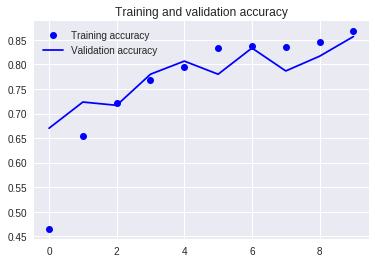

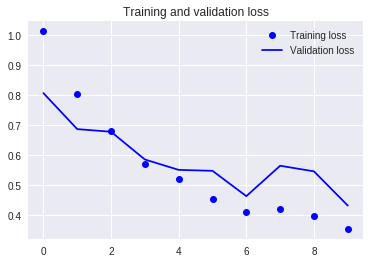

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

accuracy = history3.history['acc']
val_accuracy = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

**Step 8: **Classification Report


In [0]:
test_data = pd.read_csv('train_set/label.csv')

In [0]:
test_image = []
for i in tqdm(range(test.shape[0])):
    img = image.load_img('train_set/LR/'+'img_'+test_data['Image'][i], target_size=(28,28,3), grayscale=False)
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|██████████| 1500/1500 [00:02<00:00, 590.09it/s]


In [0]:
# making predictions
prediction = cnn3.predict_classes(test)

In [0]:
# get the indices to be plotted
y_true = test_data.iloc[:, 2]
correct = np.nonzero(prediction==y_true)[0]
incorrect = np.nonzero(prediction!=y_true)[0]

In [0]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(y_true, prediction, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.93      0.91      0.92       500
     Class 1       0.91      0.87      0.89       500
     Class 2       0.84      0.90      0.87       500

   micro avg       0.89      0.89      0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500



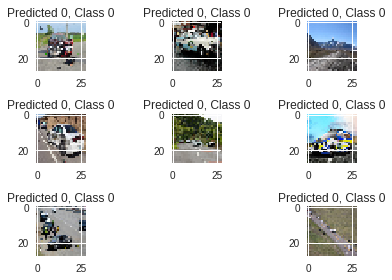

In [0]:
for i, c in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test[c].reshape(28,28,3), cmap='viridis', interpolation='none')
    plt.title("Predicted {}, Class {}".format(prediction[c], y_true[c]))
    plt.tight_layout()

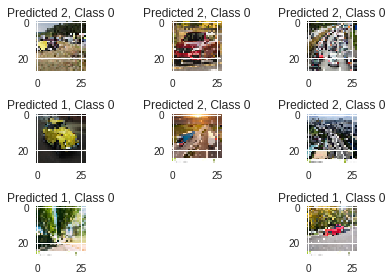

In [0]:
for i, ic in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test[ic].reshape(28,28,3), cmap='viridis', interpolation='none')
    plt.title("Predicted {}, Class {}".format(prediction[ic], y_true[ic]))
    plt.tight_layout()

In [0]:
# creating submission file
sample = pd.read_csv('label.csv')
sample['predict_label'] = prediction
print(sample[:10])
sample.to_csv('sample.csv', header=True, index=False)
from google.colab import files
files.download("sample.csv")

   Unnamed: 0     Image  Label  predict_label
0           0  0001.jpg      0              0
1           1  0002.jpg      0              0
2           2  0003.jpg      0              0
3           3  0004.jpg      0              0
4           4  0005.jpg      0              0
5           5  0006.jpg      0              0
6           6  0007.jpg      0              0
7           7  0008.jpg      0              0
8           8  0009.jpg      0              0
9           9  0010.jpg      0              0
